# Principal component analysis 실습

# 1. 데이터 전처리 및 데이터 파악
 - scikit-learn 패키지에서 데이터와 PCA로드
 참고 사이트 https://scikit-learn.org

In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA  #eigen vector와 eigen value로 나누는 과정 decomposition

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Iris데이터를 불러온다

In [9]:
iris = datasets.load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

- 설명의 편의를 위하여 독립변수 2개만 사용

In [16]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
X = iris.data[:,[0,2]]  # sepal length와 petal length 변수만 사용
Y = iris.target

In [45]:
print(X.shape)
feature_names = [iris.feature_names[0],iris.feature_names[2]]
df_X = pd.DataFrame(X, columns = feature_names)
df_X.head()

(150, 2)


,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [25]:
print(Y.shape)
df_Y = pd.DataFrame(Y)
df_Y.head()

(150,)


,0
0,0
1,0
2,0
3,0
4,0


- 결측치 여부를 파악

In [28]:
print(df_X.isnull().sum())  # 항상 결측치가 있는지 확인하자
print(df_Y.isnull().sum())

sepal length (cm)    0
petal length (cm)    0
dtype: int64
0    0
dtype: int64


In [30]:
print(set(Y))  # Y에 어떤 범주가 있는지 확인
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

--- 데이터가 어떻게 생겼는지 확인

## 기술통계량을 확인한다, 자료의 형태 파악

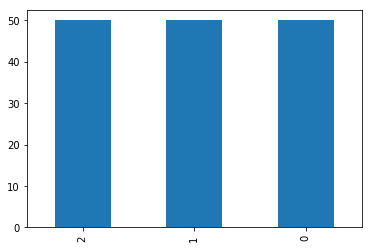

In [33]:
df_Y[0].value_counts().plot(kind='bar')
plt.show()
# 너무 범주가 한쪽으로 쏠려있는지 확인해서 분석을 진행해야한다. 

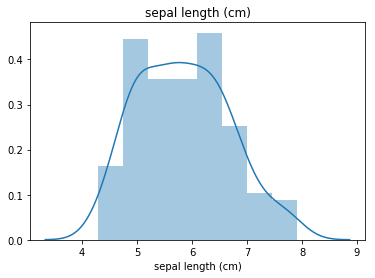

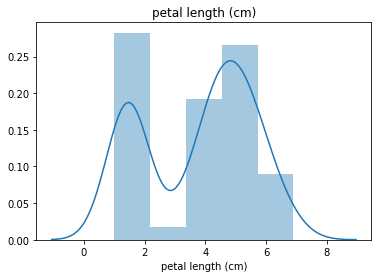

In [46]:
for i in range(df_X.shape[1]):
    sns.distplot(df_X[feature_names[i]])
    plt.title(feature_names[i])
    plt.show()
# 독립변수의 분포가 어떻게 보이나를 확인한다.
# 대략 정규분포를 따르는 모습을 보이기 때문에 연속형 변수로 분석이 가능할 것이다 판단

# PCA함수 활용 및 아웃풋 의미파악
- PCA함수를 활용하여 PC를 얻어냄. 아래의 경우에 PC 2개를 뽑아냄

In [47]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

- 아래와 같이 PC score를 얻어냄. 아래의 PC score를 이용하여 회귀분석에 활용할 수 잇음

In [49]:
pca.explained_variance_
# eigen value를 보여준다.   중요도 순으로 나타남 

array([3.66189877, 0.1400726 ])

In [50]:
# pc를 얻어내야한다. 
PCscore = pca.transform(X)
PCscore[0:5]
# pcscore는 뭐냐?  X라는 자료에 eigen vector들을 곱한값

array([[-2.46024094, -0.24479165],
       [-2.53896211, -0.06093579],
       [-2.70961121,  0.08355948],
       [-2.56511594,  0.25420858],
       [-2.49960153, -0.15286372]])

- PCscore로 구한 값이 이론값으로 구해진 값과 같은지 확인해보자

In [53]:
eigen_vector = pca.components_.transpose()  # transpose를 해줘야 매트릭스 곱이 가능
print(eigen_vector)
# 첫번째가 분산설명이 높은 eigen_vector값  두번째는 그 다음가는 vector값

[[ 0.39360585 -0.9192793 ]
 [ 0.9192793   0.39360585]]


In [57]:
# 곱하기 전에 centering을 해야한다
mX = np.matrix(X)
for i in range(X.shape[1]):
    mX[:,i] = mX[:,i]-np.mean(X[:,i])
dfmX = pd.DataFrame(mX)

In [58]:
(mX*eigen_vector)[0:5]
# 위에서 PCscore로 구한 값과 동일한 값이 나왔음을 확인할 수 있다.

matrix([[-2.46024094, -0.24479165],
        [-2.53896211, -0.06093579],
        [-2.70961121,  0.08355948],
        [-2.56511594,  0.25420858],
        [-2.49960153, -0.15286372]])

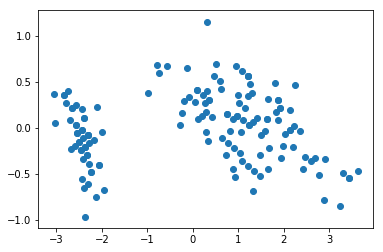

In [60]:
# 축이 바뀐 PCscore를 표현
plt.scatter(PCscore[:,0], PCscore[:,1])
plt.show()


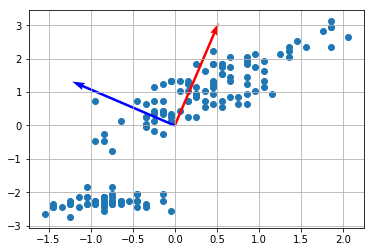

In [65]:
# 위는 축이 바뀐 PC  아래는 원래 데이터
# 아래는 선형관계를 가진 데이터  x축과 y축에 정사영을 내렸다면 겹치는 부분이있음
# 선형관계가 있기 때문에 pc를 뽑았을때 축하나가 굉장히 큰 역할을 한다.

plt.scatter(dfmX[0], dfmX[1])  # centering된 원래 데이터 표현
origin = [0], [0]  # 원점표현
plt.quiver(*origin, eigen_vector[0,:], eigen_vector[1,:], color=['r','b'],scale=3)
plt.grid()
plt.show()
#빨간 선을 기준으로 정사영을 내리면 자료가 굉장히 넓게 분포한다
# 파란선을 기준으로 상당히 좁게 분포한다
# PC1이 데이터를 많이 설명하므로 PC1으로도 설명이 많이 가능하다 

# PC를 활용한 회귀분석

- 모든 독립변수를 활용하여 PC를 뽑아냄

In [66]:
X2 = iris.data
pca2 = PCA(n_components=4)
pca2.fit(X2)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [68]:
pca2.explained_variance_
# 굉장히 PC1이 매우 잘 설명한다.

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [69]:
PCs = pca2.transform(X2)[:,0:2]

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

- 모델의 복잡성으로 인하여 기존 자료를 이용한 분석은 수렴하지 않는 모습

In [73]:
clf = LogisticRegression(solver="sag", multi_class="multinomial").fit(X2, Y)  #범주가 2개가 아닌 3개이기 때문에 클래스 정의를 해줘야한다

C:\Users\jihun\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


- PC 2개를 뽑아내서 분석한경우 모델이 수렴

In [74]:
clf2 = LogisticRegression(solver="sag", multi_class="multinomial").fit(PCs, Y)  #범주가 2개가 아닌 3개이기 때문에 클래스 정의를 해줘야한다

In [75]:
clf2.predict(PCs)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [78]:
# 제대로 됐는 지 확인을 하기 위해 confusion matrix로 확인
confusion_matrix(Y, clf2.predict(PCs))
# 0의범주는 50개 맞춤
# 1의범주는 47개 맞춤
# 2의범주는 48개 맞춤

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]], dtype=int64)

- 4개의 변수를 모두 사용하면 수렴을 안하니 임의로 변수 2개를 뽑아내어 분석해본다   그 결과 퍼포먼스가 하락한다

In [81]:
clf = LogisticRegression(solver="sag", max_iter=1000, random_state=0, multi_class="multinomial").fit(X2[:,0:2], Y) 
#  max_iter는 알고리즘이 수렴할때까지 얼마나 기다려주는지를 말한다

In [83]:
confusion_matrix(Y, clf.predict(X2[:,0:2]))
# PC를 제대로 뽑아서 한 결과와 비교해보면 성능이 떨어짐을 확인할 수 있다.

array([[49,  1,  0],
       [ 0, 37, 13],
       [ 0, 14, 36]], dtype=int64)

- 위와 같이, 차원축소를 통하여 모델의 복잡성을 줄이는 동시에 최대한 많은 정보를 활용한다
- x변수를 몇개르 버렸지만 실제론 정보를 대부분 가지고 있는 PC변수를 이용하여 퍼포먼스가 유지된다
- 즉, 차원축소의 이득을 보이는 결과임